### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [18]:
df_rating = pd.read_csv('Data.csv')
df_user = pd.read_csv('user.csv')
df_movie = pd.read_csv('item.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [19]:
df_rating.head()
df_rating.info()
df_rating.shape
df_rating.describe()
df_rating.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

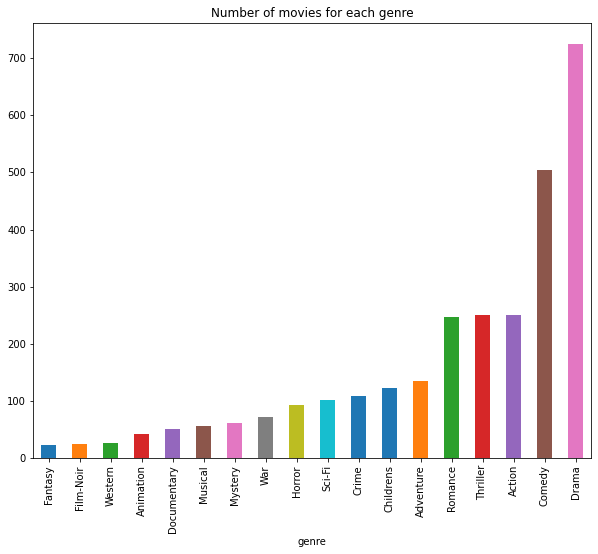

In [20]:

df_movie_genre = pd.DataFrame(columns=['genre', 'num_of_movies'])
genres_list = []


for idx in range(4, len(df_movie.columns)):
    genres_list.append(df_movie.columns[idx])
for genre in genres_list:
    row = genre, df_movie[df_movie[genre]==1][['movie id']].count()
    df_movie_genre.loc[len(df_movie_genre)] = row
df_movie_genre['num_of_movies'] = df_movie_genre['num_of_movies'].astype(np.int32)
df_movie_genre = df_movie_genre.sort_values('num_of_movies', ascending=True).set_index('genre')

plot_fig = df_movie_genre['num_of_movies'].plot(kind='bar', figsize=(10,8))
plot_fig.set_title('Number of movies for each genre')
plot_fig.set_xlabel('genre');


#### 5. Find the movies that have more than one genre - 2.5 marks

In [6]:
df_movies_temp = df_movie['movie title'].value_counts() > 1
print(df_movies_temp)

That Darn Cat!                                True
Sabrina                                       True
Desperate Measures                            True
Scarlet Letter, The                           True
Fly Away Home                                 True
Designated Mourner, The                       True
Hugo Pool                                     True
Hurricane Streets                             True
Kull the Conqueror                            True
Sliding Doors                                 True
Body Snatchers                                True
Shall We Dance?                               True
Deceiver                                      True
Substance of Fire, The                        True
Chairman of the Board                         True
Ice Storm, The                                True
Money Talks                                   True
Butcher Boy, The                              True
Chasing Amy                                   True
Cape Fear                      

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [21]:
df_movie.drop(df_movie[df_movie['unknown'] == 1].index, inplace = True)
df_movie.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

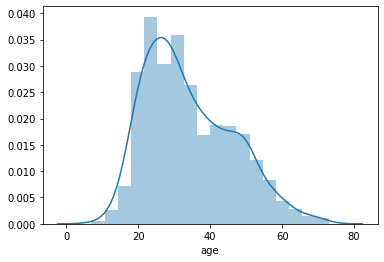

In [22]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.
sns.distplot(df_user['age'])

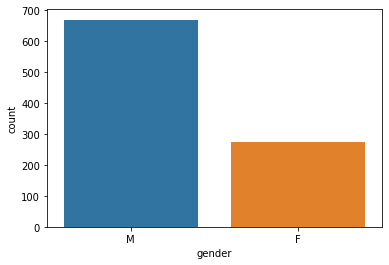

In [9]:
gender_count = sns.countplot(x="gender", data=df_user)

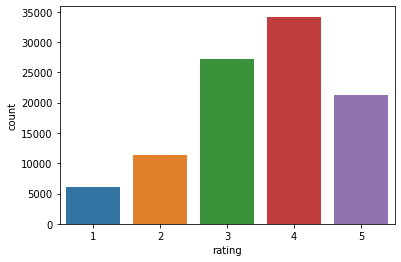

In [23]:
rating_count = sns.countplot(x="rating", data=df_rating)

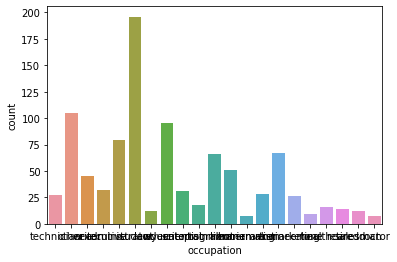

In [24]:
occupation_count = sns.countplot(x="occupation", data=df_user)

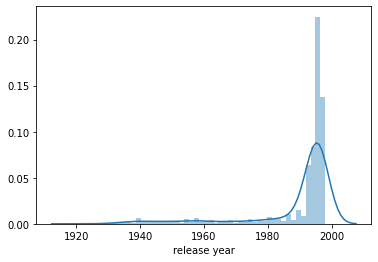

In [25]:
df_movie['release year'] = df_movie['release date'].apply(lambda x: x.split('-')[2])
df_movie.head()
sns.distplot(df_movie['release year'])

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

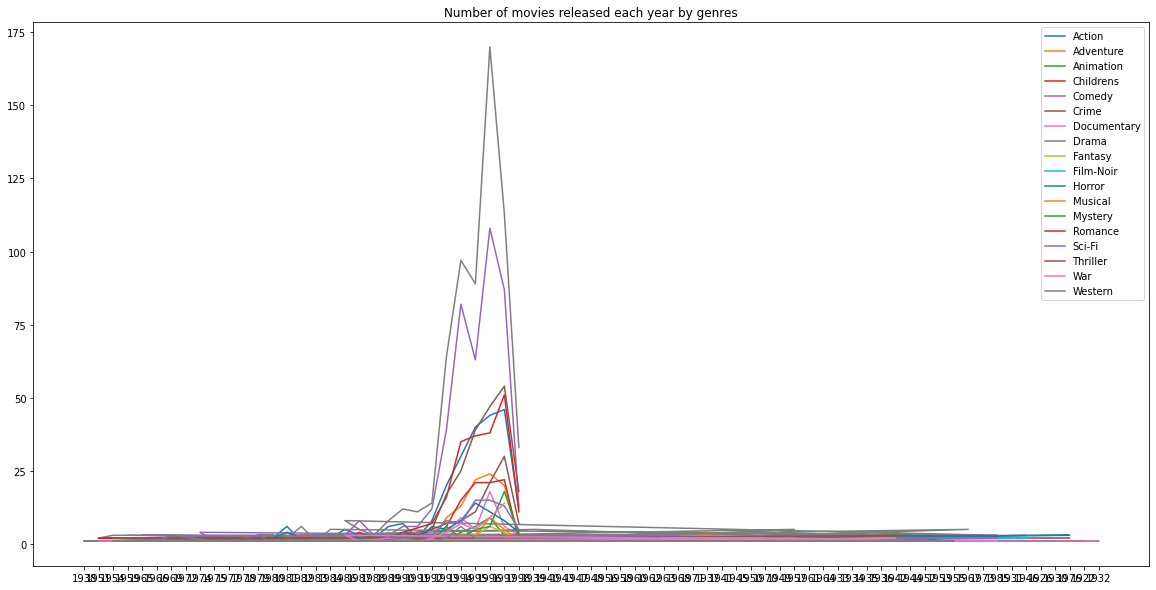

In [26]:
plt.figure(figsize=(20,10)) 
for genre in genres_list:
    df_genre = df_movie[df_movie[genre]==1][['release year', 'movie id']]
    
    df_genre = df_genre.groupby(['release year']).count().reset_index().rename(columns={'release year':'year', 'movie id':'#movies'})
    
    plt.plot(df_genre['year'], df_genre['#movies'], label=genre)
plt.title('Number of movies released each year by genres')
plt.legend()
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

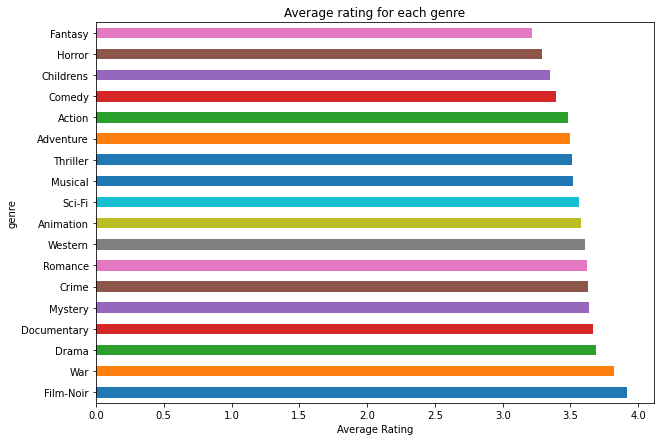

In [44]:
df_temp = df_rating.merge(df_movie, left_on='movie id', right_on='movie id', how='left')
df_final = df_temp.merge(df_user, left_on='user id', right_on='user id', how='left')
df_final.head()
df_avg_rating = pd.DataFrame(columns=['genre', 'avg_rating'])

for genre in genres_list:
    row = [genre, round(df_final[df_final[genre]==1][['rating']].mean(), 2).to_string()[6:]]
    df_avg_rating.loc[len(df_avg_rating)] = row
df_avg_rating['avg_rating'] = pd.to_numeric(df_avg_rating['avg_rating'], errors='coerce')
df_avg_rating = df_avg_rating.sort_values('avg_rating', ascending=False).set_index('genre')
plot_fig = df_avg_rating['avg_rating'].plot(kind='barh', figsize=(10,7))
plot_fig.set_title('Average rating for each genre')
plot_fig.set_xlabel('Average Rating');

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


In [51]:
for genre in genres_list:
    row = [genre, df_final[df_final[genre]==1][['gender']== 'M'].count()]
    print(row)

KeyError: False

1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:

